In [4]:
try:
    import json
    import os
    
    import pandas as  pd
    import spacy
    
    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob
    
    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer
    
    import swifter
    
    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

In [32]:
flight_rasp = pd.read_csv("flight_rasp_data.csv")

In [33]:
final_table = pd.read_csv("final_table_v2.csv")

In [43]:
flight_rasp = flight_rasp.join(final_table['sum_bsm'])

In [45]:
flight_rasp_v2 = flight_rasp

In [46]:
flight_rasp_v2['t_st'] = pd.to_datetime(flight_rasp_v2['t_st'], 
format = '%Y-%m-%d %H:%M:%S', 
errors = 'coerce')

In [39]:
flight_rasp_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28267 entries, 0 to 28266
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   i_id                  28267 non-null  float64       
 1   departure_terminal    28267 non-null  object        
 2   checkin_terminal      28267 non-null  object        
 3   airline_grouped_hash  28267 non-null  object        
 4   cco_hash              28267 non-null  object        
 5   flt_hash              28267 non-null  object        
 6   t_st                  28267 non-null  datetime64[ns]
 7   m_city_rus1           28267 non-null  object        
 8   m_city_rus2           28267 non-null  object        
 9   config                28267 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 2.2+ MB


In [49]:
flight_rasp_v2['t_st_year'] = flight_rasp_v2['t_st'].dt.year
flight_rasp_v2['t_st_month'] = flight_rasp_v2['t_st'].dt.month
flight_rasp_v2['t_st_day'] = flight_rasp_v2['t_st'].dt.day
flight_rasp_v2['t_st_hour'] = flight_rasp_v2['t_st'].dt.hour
flight_rasp_v2['t_st_minute'] = flight_rasp_v2['t_st'].dt.minute
flight_rasp_v2['t_st_second'] = flight_rasp_v2['t_st'].dt.second

In [ ]:
flight_rasp_v2.head()

In [52]:
flight_rasp_v2 = flight_rasp_v2.drop(['t_st'], axis=1)

In [68]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(flight_rasp_v2['departure_terminal'])
flight_rasp_v2['departure_terminal'] = le.transform(flight_rasp_v2['departure_terminal'])

le.fit(flight_rasp_v2['checkin_terminal'])
flight_rasp_v2['checkin_terminal'] = le.transform(flight_rasp_v2['checkin_terminal'])

le.fit(flight_rasp_v2['airline_grouped_hash'])
flight_rasp_v2['airline_grouped_hash'] = le.transform(flight_rasp_v2['airline_grouped_hash'])


le.fit(flight_rasp_v2['cco_hash'])
flight_rasp_v2['cco_hash'] = le.transform(flight_rasp_v2['cco_hash'])


le.fit(flight_rasp_v2['flt_hash'])
flight_rasp_v2['flt_hash'] = le.transform(flight_rasp_v2['flt_hash'])

le.fit(flight_rasp_v2['m_city_rus1'])
flight_rasp_v2['m_city_rus1'] = le.transform(flight_rasp_v2['m_city_rus1'])

le.fit(flight_rasp_v2['m_city_rus2'])
flight_rasp_v2['m_city_rus2'] = le.transform(flight_rasp_v2['m_city_rus2'])

In [72]:
flight_rasp_v2.head()

,departure_terminal,checkin_terminal,airline_grouped_hash,cco_hash,flt_hash,m_city_rus1,m_city_rus2,config,t_st_year,t_st_month,t_st_day,t_st_hour,t_st_minute,t_st_second
0,0,0,21,34,265,0,109,156,2023,7,8,0,5,0
1,1,1,11,11,227,0,114,202,2023,7,8,0,5,0
2,0,0,21,34,169,0,25,158,2023,7,8,0,10,0
3,0,0,21,34,385,0,41,156,2023,7,8,0,10,0
4,0,0,21,34,326,0,1,196,2023,7,8,0,15,0


In [71]:
X = flight_rasp_v2.drop('sum_bsm', axis=1)

In [106]:
flight_rasp_v2.to_csv("final_table_with_x_y.csv", index=False)

In [74]:
y = flight_rasp_v2['sum_bsm']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.1, random_state= 0)

In [178]:
#RNN
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import Activation, Dense

model2 = Sequential()
model2.add(LSTM(X_train.shape[1], return_sequences=True, input_shape=[X_train.shape[1], 1]))
model2.add(LSTM(X_train.shape[1], return_sequences=False))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])
history = model2.fit(X_train, y_train, batch_size = 1, epochs=200)

Epoch 1/200
25440/25440 [==============================] - 81s 3ms/step - loss: 7299.3315 - accuracy: 0.0010
Epoch 2/200
25440/25440 [==============================] - 79s 3ms/step - loss: 6366.3105 - accuracy: 8.2547e-04
Epoch 3/200
25440/25440 [==============================] - 79s 3ms/step - loss: 5866.7837 - accuracy: 8.2547e-04
Epoch 4/200
25440/25440 [==============================] - 80s 3ms/step - loss: 4402.3628 - accuracy: 0.0017
Epoch 5/200
25440/25440 [==============================] - 79s 3ms/step - loss: 2979.5894 - accuracy: 0.0300
Epoch 6/200
25440/25440 [==============================] - 79s 3ms/step - loss: 2129.4075 - accuracy: 0.0373
Epoch 7/200
25440/25440 [==============================] - 79s 3ms/step - loss: 1814.5651 - accuracy: 0.0399
Epoch 8/200
25440/25440 [==============================] - 79s 3ms/step - loss: 1588.6257 - accuracy: 0.0467
Epoch 9/200
25440/25440 [==============================] - 79s 3ms/step - loss: 1785.3636 - accuracy: 0.0458
Epoch 10/20

In [ ]:
import pickle

# save the model to disk
filename = 'RNN_model_200.sav'
pickle.dump(model2, open(filename, 'wb'))

In [2]:
# load the model from disk
filename = 'RNN_model_200.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [7]:
#for training
import pandas as  pd

xy = pd.read_csv("final_table_with_x_y.csv")

X = xy.drop('sum_bsm', axis=1)
y = xy['sum_bsm']

In [ ]:
#for training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.1, random_state= 0)

In [9]:
pred1 = loaded_model.predict(X_test)

89/89 [==============================] - 1s 1ms/step


In [189]:
df1 = pd.DataFrame(pred1)
df1.to_csv('pred1.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

In [12]:
y_test_ = y_test
pred1.sort(axis=0)
new_numpy = y_test_.to_numpy(dtype=int)
new_numpy.sort(axis=0)

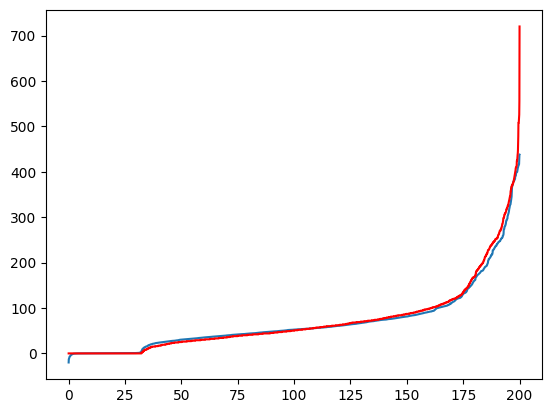

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**2*np.exp(-x**2)
x = np.linspace ( start = 0.    # lower limit
                , stop = 200      # upper limit
                , num = 2827      # generate 51 points between 0 and 3
                )
# x = x.reshape(2827,1)
y = pred1    # This is already vectorized, that is, y will be a vector!
plt.plot(x, y)
yy = new_numpy
plt.plot(x, yy, 'r-')
plt.show()